In [92]:
%load_ext autoreload
%autoreload 2

import warnings

import jax.numpy as jnp
import matplotlib.pyplot as plt

from diffbank.bank import Bank
from diffbank.noise import Sn_aLIGO as Sn
from diffbank.utils import get_m1_m2_sampler
from diffbank.waveforms.threePN_simple import amp, Psi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
m_range = (1.4, 5.0)
sampler = get_m1_m2_sampler(m_range, m_range)
bank_s = Bank.load("../scripts/banks/3pn-stochastic.npz", amp, Psi, Sn, sampler)

# Get bank statistics
eta_ests = []
eta_est_errs = []
n_templatess = []
for i in range(1, 62):
    bank = Bank.load(f"../scripts/banks/3pn-random-{i}.npz", amp, Psi, Sn, sampler)
    eta_ests.append(bank.eta_est)
    eta_est_errs.append(bank.eta_est_err)
    n_templatess.append(bank.n_templates)

eta_ests = jnp.array(eta_ests)
eta_est_errs = jnp.array(eta_est_errs)
n_templatess = jnp.array(n_templatess)

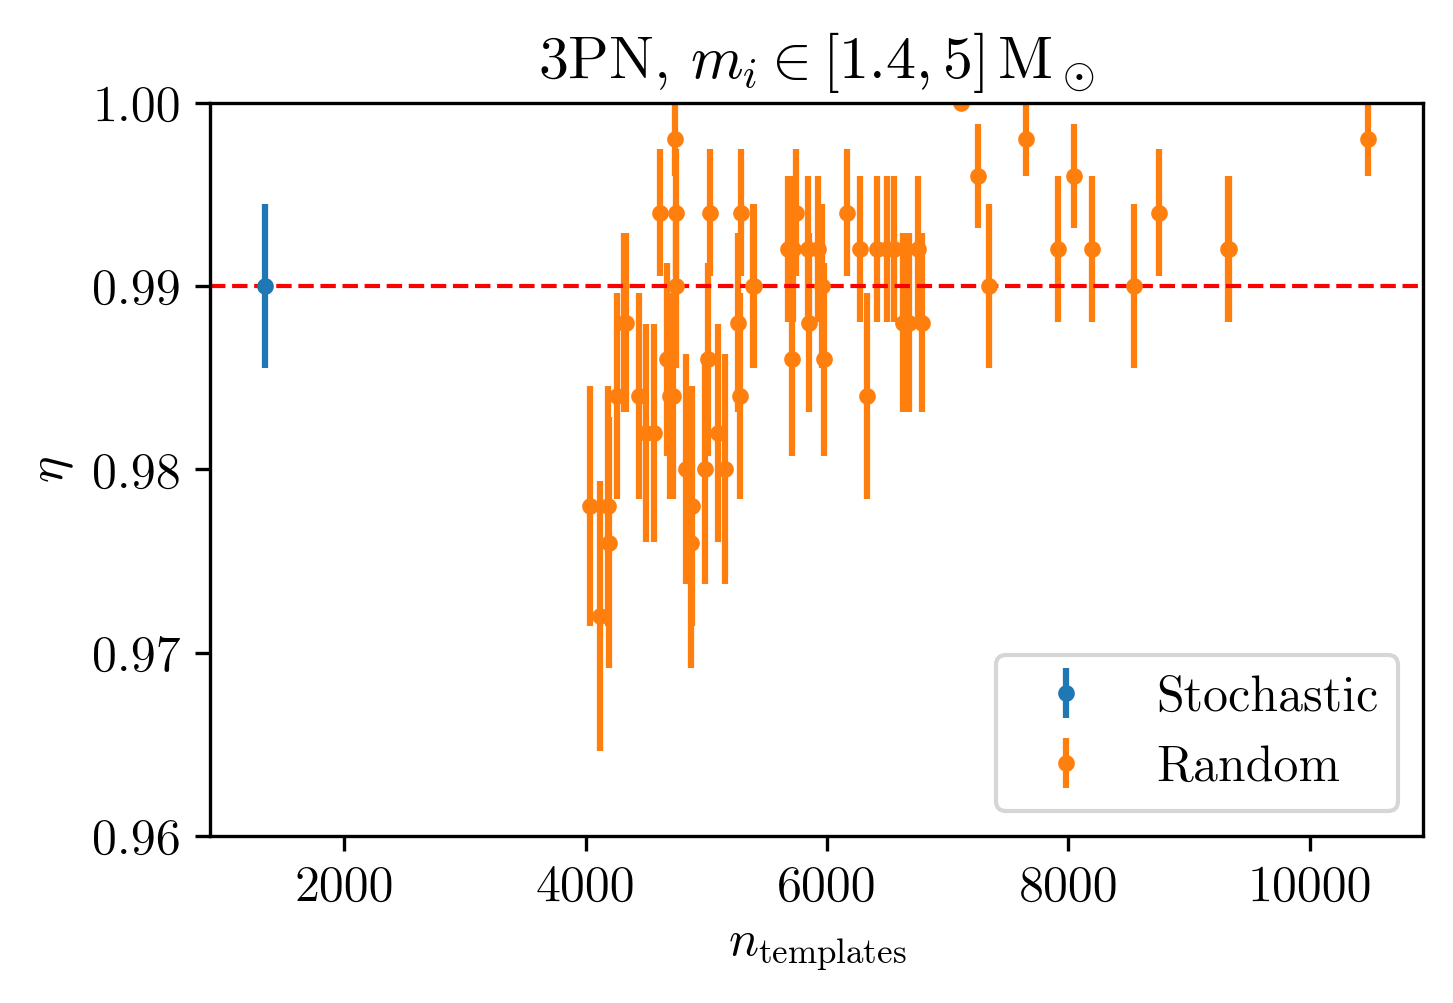

In [121]:
plt.axhline(bank_s.eta, linestyle="--", color="r", linewidth=1)
plt.errorbar(
    bank_s.n_templates,
    bank_s.eta_est,
    yerr=bank_s.eta_est_err,
#     c="C0",
    fmt=".",
    label="Stochastic",
)
plt.errorbar(n_templatess, eta_ests, yerr=eta_est_errs, fmt=".", label="Random")

plt.xlabel(r"$n_\mathrm{templates}$")
plt.ylabel(r"$\eta$")
plt.legend(loc="lower right")
plt.ylim(0.96, 1)
plt.title(r"3PN, $m_i \in [%g, %g] \, \mathrm{M}_\odot$" % m_range)
plt.tight_layout()
plt.savefig("../scripts/figures/3PN-n-eta.pdf")

/Users/acoogan/.pyenv/versions/3.9.1/envs/tbanks-3.9.1/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6665: RuntimeWarning: invalid value encountered in multiply
  tops = (tops * np.diff(bins))[:, slc].cumsum(axis=1)[:, slc]


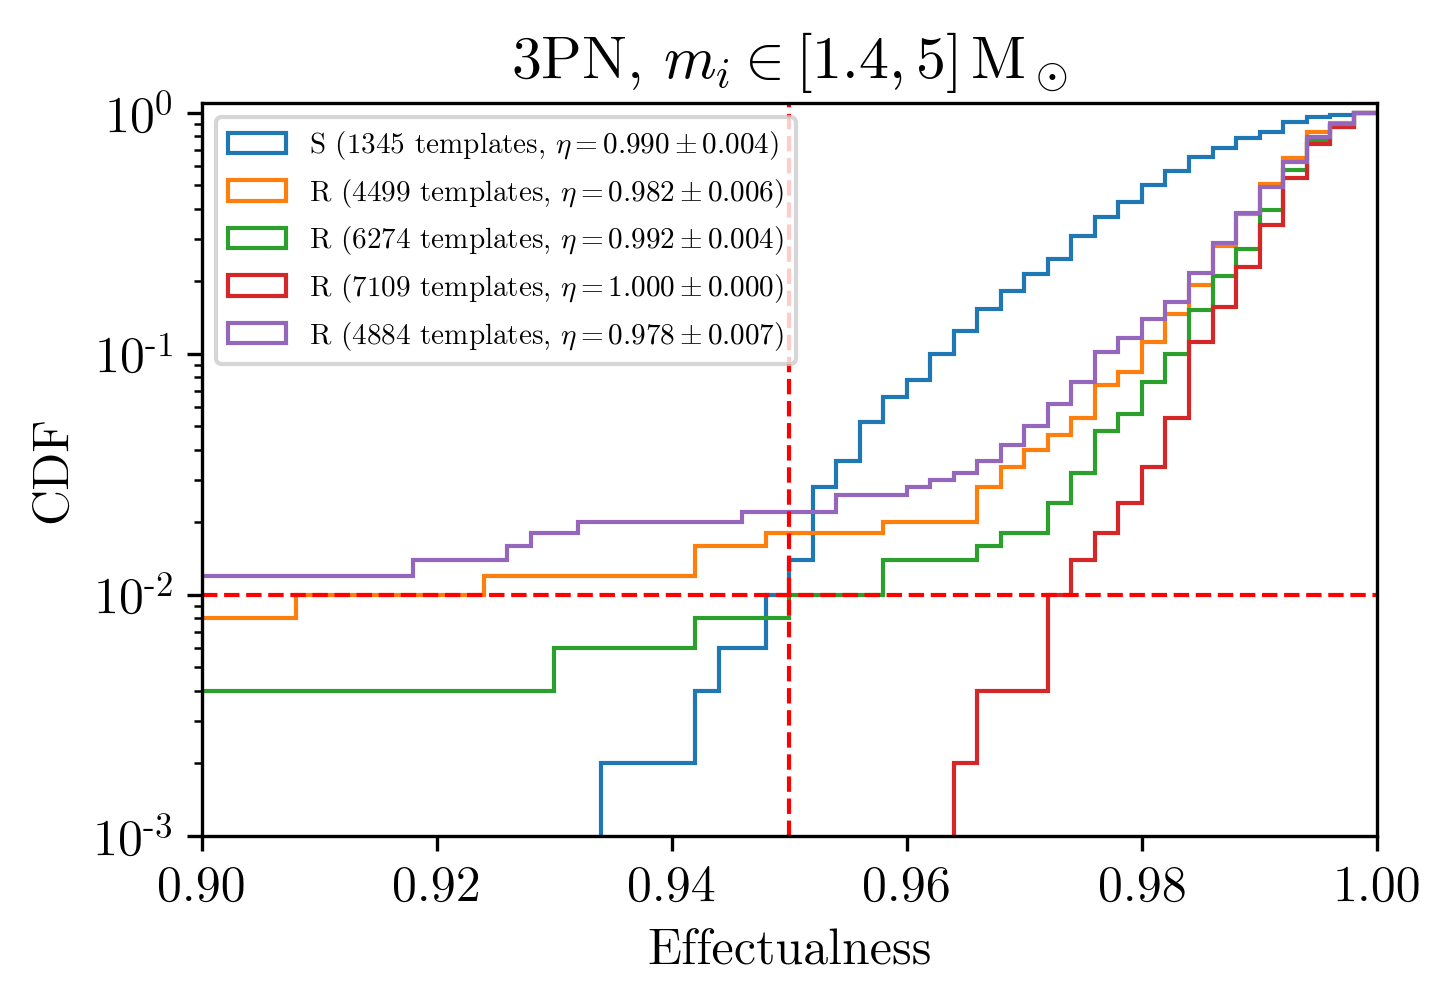

In [124]:
n_eff = len(bank_s.effectualnesses)
bins = jnp.concatenate(
    (jnp.array([0.0]), jnp.linspace(0.9, 1, int(0.1 * n_eff + 1)), jnp.array([jnp.inf]))
)
plt.hist(
    bank_s.effectualnesses,
    bins=bins,
    density=True,
    cumulative=True,
    histtype="step",
    #     color="r",
    label=r"S (%i templates, $\eta = %.3f \pm %.3f$)"
    % (bank_s.n_templates, bank_s.eta_est, bank_s.eta_est_err),
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(1, 62, 20):
        bank = Bank.load(f"../scripts/banks/3pn-random-{i}.npz", amp, Psi, Sn, sampler)
        plt.hist(
            bank.effectualnesses,
            bins=bins,
            density=True,
            cumulative=True,
            histtype="step",
            #         color="C1"
            label=r"R (%i templates, $\eta = %.3f \pm %.3f$)"
            % (bank.n_templates, bank.eta_est, bank.eta_est_err),
        )

plt.axvline(1 - bank_s.m_star, color="r", linestyle="--", linewidth=1)
plt.axhline(1 - bank_s.eta, color="r", linestyle="--", linewidth=1)
plt.axhline(5)
plt.axhline(4)

plt.legend(loc="upper left", frameon=True, fontsize=7)
plt.xlim(bins[1], 1)
plt.ylim(0.5 / n_eff, 1.1)
plt.yscale("log")
plt.xlabel("Effectualness")
plt.ylabel("CDF")
plt.title(r"3PN, $m_i \in [%g, %g] \, \mathrm{M}_\odot$" % m_range)
plt.tight_layout()
plt.savefig("../scripts/figures/3PN-eff-cdfs.pdf")

In [125]:
from jax.experimental import ode

In [ ]:
ode()